# Install and Load Library

In [66]:
# channel attribution analysis and markov modeling
!pip install marketing_attribution_models

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from marketing_attribution_models import MAM

%matplotlib inline

# Load Dataset

In [93]:
raw_data = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/campaign_data/campaign_data.csv")

In [94]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650000 entries, 0 to 649999
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   cookie            650000 non-null  object 
 1   time              650000 non-null  object 
 2   interaction       650000 non-null  object 
 3   conversion        650000 non-null  int64  
 4   conversion_value  650000 non-null  float64
 5   channel           650000 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 29.8+ MB


In [95]:
raw_data

,cookie,time,interaction,conversion,conversion_value,channel
0,9AACfh9fhA7EEn0fn0hihDBfD,2018-07-21T23:25:13Z,impression,0,0.0,Instagram
1,CoCko0ih7EF993ABBoCnC9F3F,2018-07-13T22:49:52Z,impression,0,0.0,Facebook
2,hB9o3if3A33F0Eh97EDhEk9F7,2018-07-07T22:20:16Z,impression,0,0.0,Facebook
3,hB9o3if3A33F0Eh97EDhEk9F7,2018-07-07T22:20:48Z,impression,0,0.0,Facebook
4,99E9ohDDhnkiCDofo7k73nii0,2018-07-29T09:23:04Z,impression,0,0.0,Paid Search
...,...,...,...,...,...,...
649995,Af3Dohk39k73DoknC7EokAB3A,2018-07-07T12:44:35Z,impression,0,0.0,Paid Search
649996,Af3Dohk39k73DoknC7EokAB3A,2018-07-14T11:28:22Z,impression,0,0.0,Facebook
649997,Af3Dohk39k73DoknC7EokAB3A,2018-07-15T11:51:17Z,impression,0,0.0,Facebook
649998,Af3Dohk39k73DoknC7EokAB3A,2018-07-18T13:33:38Z,impression,0,0.0,Facebook


# Data Inspection

In [96]:
raw_data.groupby(raw_data.columns.tolist(),as_index=False).size()

,cookie,time,interaction,conversion,conversion_value,channel,size
0,00000FkCnDfDDf0iC97iC703B,2018-07-03T13:02:11Z,impression,0,0.0,Instagram,1
1,00000FkCnDfDDf0iC97iC703B,2018-07-17T19:15:07Z,impression,0,0.0,Online Display,1
2,00000FkCnDfDDf0iC97iC703B,2018-07-24T15:51:46Z,impression,0,0.0,Online Display,1
3,00000FkCnDfDDf0iC97iC703B,2018-07-29T07:44:51Z,impression,0,0.0,Online Display,1
4,0000nACkD9nFkBBDECD3ki00E,2018-07-03T09:44:57Z,impression,0,0.0,Paid Search,1
...,...,...,...,...,...,...,...
644989,ooooEiB0CCoEf9fiiC90Dfhfk,2018-07-12T23:50:45Z,impression,0,0.0,Online Display,1
644990,ooooEiB0CCoEf9fiiC90Dfhfk,2018-07-12T23:50:54Z,impression,0,0.0,Online Display,1
644991,ooooiBh70D3k3BfAhDFfii9h7,2018-07-03T12:57:25Z,impression,0,0.0,Paid Search,1
644992,ooooiBh70D3k3BfAhDFfii9h7,2018-07-19T08:17:59Z,impression,0,0.0,Online Video,1


Check number of null values inside dataset.

In [97]:
raw_data.isna().sum()

cookie              0
time                0
interaction         0
conversion          0
conversion_value    0
channel             0
dtype: int64

# Data Exploration

Calculate number of transactions and its values based for each user and each channel.

In [98]:
# change Date column to Date-type
raw_data['time'] = pd.to_datetime(raw_data['time'], format="yyyy-MM-dd'T'HH:mm:ss.SSS'Z'", errors='coerce')

Calculate number of transactions and its values based for each user and each channel.

In [100]:
# Group By The Specific Variables
raw_data = raw_data.groupby(['cookie', 'time', 'channel', 'interaction'], as_index=False).size().sort_values(by=['conversion'], ascending = False)

KeyError: ignored

Check number of transactions based on channel grouping

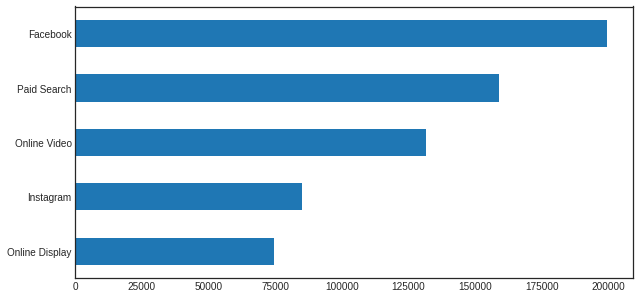

In [83]:
plt.figure(figsize=(10,5))
raw_data['channel'].value_counts(ascending=True).plot(kind='barh')
plt.show()

Check number of transactions based on source, top 10

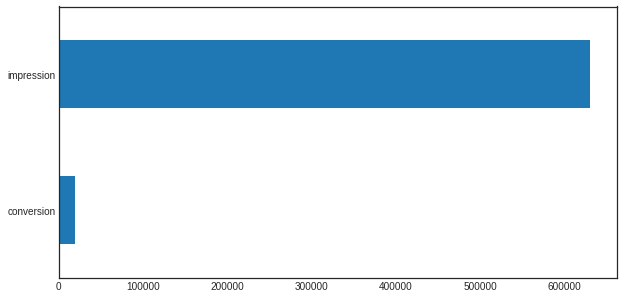

In [85]:
plt.figure(figsize=(10,5))
raw_data['interaction'].value_counts(ascending=True).tail(10).plot(kind='barh')
plt.show()

Check number of transactions based on channel and source

In [104]:
# Group By The Specific Variables
raw_data.groupby(['channel', 'interaction'], as_index=False).size().sort_values(by=['size'], ascending = False)

,channel,interaction,size
1,Facebook,impression,193260
9,Paid Search,impression,154194
7,Online Video,impression,127776
3,Instagram,impression,82726
5,Online Display,impression,72431
0,Facebook,conversion,6052
8,Paid Search,conversion,4768
6,Online Video,conversion,3992
2,Instagram,conversion,2555
4,Online Display,conversion,2246


# Attribution analysis

## Average Revenue per Channel

In [103]:
raw_data

,cookie,time,interaction,conversion,conversion_value,channel
0,9AACfh9fhA7EEn0fn0hihDBfD,NaT,impression,0,0.0,Instagram
1,CoCko0ih7EF993ABBoCnC9F3F,NaT,impression,0,0.0,Facebook
2,hB9o3if3A33F0Eh97EDhEk9F7,NaT,impression,0,0.0,Facebook
3,hB9o3if3A33F0Eh97EDhEk9F7,NaT,impression,0,0.0,Facebook
4,99E9ohDDhnkiCDofo7k73nii0,NaT,impression,0,0.0,Paid Search
...,...,...,...,...,...,...
649995,Af3Dohk39k73DoknC7EokAB3A,NaT,impression,0,0.0,Paid Search
649996,Af3Dohk39k73DoknC7EokAB3A,NaT,impression,0,0.0,Facebook
649997,Af3Dohk39k73DoknC7EokAB3A,NaT,impression,0,0.0,Facebook
649998,Af3Dohk39k73DoknC7EokAB3A,NaT,impression,0,0.0,Facebook


In [107]:
channel_attribute_value = aggregated_data.assign(
    n_events = 0
).groupby(
    ['channel', 'interaction'], as_index=False
).agg({
    'conversion': 'sum',
    'conversion_value': 'sum',
    'cookie' : 'nunique'
}).rename(
    columns={"cookie":"total_cookies"}
).assign(
    revenue_per_conversion = lambda x: x['conversion']/x['conversion_value']
).sort_values(by=['conversion'], ascending=False).copy()

Check channel attribution value

In [108]:
channel_attribute_value

,channel,interaction,conversion,conversion_value,total_cookies,revenue_per_conversion


In [109]:
channel_attribute_value['channel'] = channel_attribute_value['channel'].str.cat(channel_attribute_value[['channel']], sep='-')

IndexError: ignored

<Figure size 720x360 with 0 Axes>

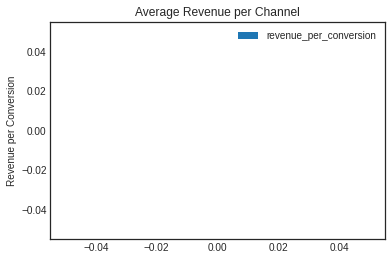

In [111]:
plt.figure(figsize=(10,5))
channel_attribute_value[['channel', 'revenue_per_conversion']].sort_values(
  by = ['revenue_per_conversion'],
  ascending = True 
).plot(
    x = 'channel', 
    y = 'revenue_per_conversion', 
    kind = 'barh',
    title = 'Average Revenue per Channel',
    xlabel = 'Channel',
    ylabel = 'Revenue per Conversion'
)
plt.show()

<Figure size 720x360 with 0 Axes>

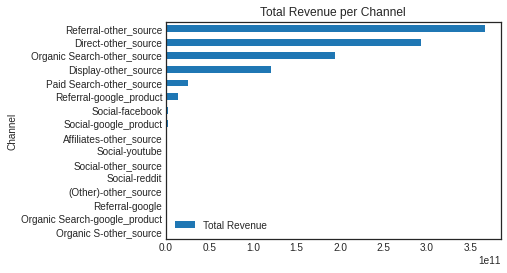

In [ ]:
plt.figure(figsize=(10,5))
channel_attribute_value[['channel_source', 'totalTransactionRevenue']].sort_values(
  by = ['totalTransactionRevenue'],
  ascending = True 
).rename(
    columns = {'totalTransactionRevenue':'Total Revenue'}
).plot(
    x = 'channel_source', 
    y = 'Total Revenue', 
    kind = 'barh',
    title = 'Total Revenue per Channel',
    xlabel = 'Channel',
    ylabel = 'Total Revenue'
)
plt.show()

## Conversion per Channel

<Figure size 720x360 with 0 Axes>

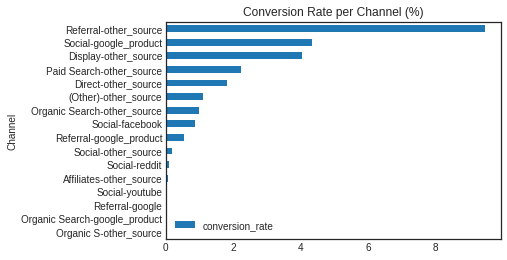

In [ ]:
plt.figure(figsize=(10,5))
channel_attribute_value.assign(
    conversion_rate = lambda x: x['transactions'] * 100/x['total_visitors']
).sort_values(
  by = ['conversion_rate'],
  ascending = True 
).plot(
    x = 'channel_source', 
    y = 'conversion_rate', 
    kind = 'barh',
    title = 'Conversion Rate per Channel (%)',
    xlabel = 'Channel',
    ylabel = 'Conversion Rate'
)
plt.show()

# Channel Attribution by Model

## Heuristic Model

In [ ]:
raw_data.columns

Index(['fullVisitorId', 'VisitNumber', 'Date', 'VisitStartTime', 'bounces',
       'pageviews', 'timeOnSite', 'totalTransactionRevenue', 'transactions',
       'source', 'medium', 'campaign', 'deviceCategory', 'operatingSystem',
       'mobileDeviceModel', 'city', 'ChannelGrouping'],
      dtype='object')

In [ ]:
# data preprocessing
raw_data['totalTransactionRevenue'].fillna(0, inplace=True)
raw_data['has_transaction'] = raw_data.transactions.apply(lambda x: True if x > 0 else False)

In [ ]:
data_for_model = raw_data[['fullVisitorId', 'ChannelGrouping', 'Date', 'transactions', 'totalTransactionRevenue', 'has_transaction']]

In [ ]:
attribution = MAM(
    data_for_model, 
    channels_colname='ChannelGrouping',
    group_channels=True, 
    group_channels_by_id_list=['fullVisitorId'], 
    group_timestamp_colname='Date',
    journey_with_conv_colname='has_transaction',
    create_journey_id_based_on_conversion = True,
    conversion_value='totalTransactionRevenue'
)

**Last Click Attribution**

In [ ]:
attribution.attribution_last_click()

(0                [0.0]
 1                [0.0]
 2                [0.0]
 3         [39590000.0]
 4                [0.0]
               ...     
 367448           [0.0]
 367449           [0.0]
 367450      [0.0, 0.0]
 367451           [0.0]
 367452           [0.0]
 Length: 367453, dtype: object, channels
 (Other)           1.199000e+07
 Affiliates        5.586700e+08
 Direct            2.932417e+11
 Display           1.210427e+11
 Organic S         0.000000e+00
 Organic Search    1.942245e+11
 Paid Search       2.499711e+10
 Referral          3.805965e+11
 Social            5.364030e+09
 Name: value, dtype: float64)

**First Click Attribution**

In [ ]:
attribution.attribution_first_click()

(0                [0.0]
 1                [0.0]
 2                [0.0]
 3         [39590000.0]
 4                [0.0]
               ...     
 367448           [0.0]
 367449           [0.0]
 367450      [0.0, 0.0]
 367451           [0.0]
 367452           [0.0]
 Length: 367453, dtype: object,
          channels  attribution_first_click_heuristic
 0         (Other)                       1.335600e+08
 1      Affiliates                       5.656600e+08
 2          Direct                       3.142154e+11
 3         Display                       1.103892e+11
 4       Organic S                       0.000000e+00
 5  Organic Search                       2.211920e+11
 6     Paid Search                       2.545675e+10
 7        Referral                       3.429524e+11
 8          Social                       5.132150e+09)

**Linear Attribution**

In [ ]:
attribution.attribution_linear()

(0                [0.0]
 1                [0.0]
 2                [0.0]
 3         [39590000.0]
 4                [0.0]
               ...     
 367448           [0.0]
 367449           [0.0]
 367450      [0.0, 0.0]
 367451           [0.0]
 367452           [0.0]
 Length: 367453, dtype: object,          channels  attribution_linear_heuristic
 0         (Other)                  9.939900e+07
 1      Affiliates                  5.762093e+08
 2          Direct                  3.060341e+11
 3         Display                  1.099983e+11
 4       Organic S                  0.000000e+00
 5  Organic Search                  2.117396e+11
 6     Paid Search                  2.601060e+10
 7        Referral                  3.605343e+11
 8          Social                  5.044700e+09)

## Attribution Plot

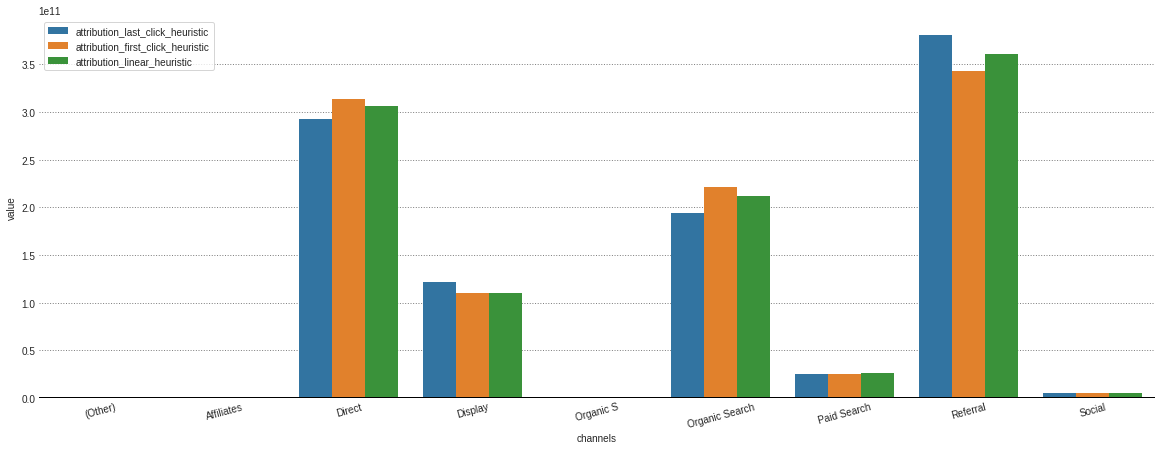

In [ ]:
attribution.plot(model_type='heuristic');

## Markov Model

In [ ]:
# create markov results
markov_results = attribution.attribution_markov(transition_to_same_state=False)

In [ ]:
# check markov results
markov_results[1]

,channels,attribution_markov_algorithmic
0,Affiliates,5.847744e+08
1,Referral,3.391182e+11
2,Direct,2.836192e+11
3,Display,1.271870e+11
4,Organic Search,2.350412e+11
5,Social,6.180672e+09
6,Paid Search,2.808466e+10
7,Organic S,0.000000e+00
8,(Other),2.213732e+08


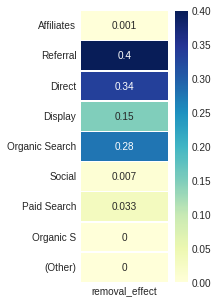

In [ ]:
# check removal effects
ax, fig = plt.subplots(figsize=(2,5))
sns.heatmap(
    markov_results[3].round(3), 
    cmap="YlGnBu", 
    annot=True, 
    linewidths=.5
);

## Attribution Plot

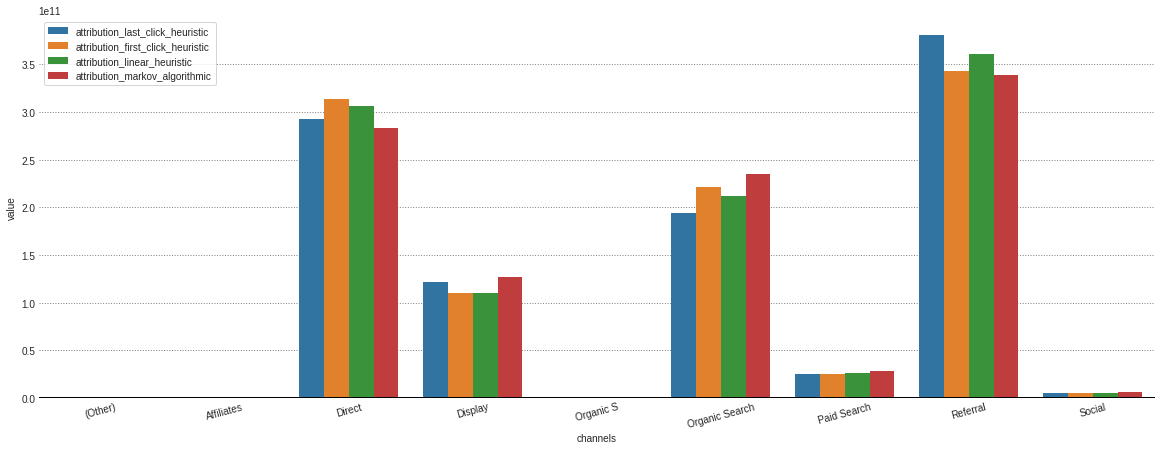

In [ ]:
attribution.plot();

# Task

Carilah attribution dari tiap channel pada data berikut: "https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/campaign_data/campaign_data.csv"

- dengan menggunakan model heuristik
- dengan menggunakan model Markov

selain itu carilah removal effects dari tiap channel berdasarkan model Markov